## 1. Setup and Load Data

In [62]:
import tensorflow as tf
import cv2

In [61]:
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.18.0
OpenCV version: 4.10.0


In [20]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.8
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.55.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.68.0
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.29.0
jedi                         0.19.2
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.6.0



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [22]:
import os

In [23]:
os.listdir('Potato Pest Dataset')

['.DS_Store',
 'SL01 Agrotis ipsilon (Hufnagel)',
 'SL02 Amrasca devastans (Distant)',
 'SL03 Aphis gossypii Glover',
 'SL05 Bemisia tabaci (Gennadius)',
 'SL06 Brachytrypes portentosus Lichtenstein',
 'SL10 Epilachna vigintioctopunctata (Fabricius)',
 'SL15 Myzus persicae (Sulzer)',
 'SL17 Phthorimaea operculella (Zeller)']

In [24]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [25]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [26]:
# Avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove images 

In [27]:
import cv2 
import imghdr
from matplotlib import pyplot as plt 

In [28]:
data_dir = 'Potato Pest Dataset'

In [29]:
os.listdir(os.path.join(data_dir, 'SL15 Myzus persicae (Sulzer)'))

['Myzus persicae (Sulzer)_1.jpg',
 'Myzus persicae (Sulzer)_10.jpg',
 'Myzus persicae (Sulzer)_11.jpg',
 'Myzus persicae (Sulzer)_12.jpg',
 'Myzus persicae (Sulzer)_13.jpg',
 'Myzus persicae (Sulzer)_14.jpg',
 'Myzus persicae (Sulzer)_15.jpg',
 'Myzus persicae (Sulzer)_16.jpg',
 'Myzus persicae (Sulzer)_17.jpg',
 'Myzus persicae (Sulzer)_18.jpg',
 'Myzus persicae (Sulzer)_19.jpg',
 'Myzus persicae (Sulzer)_2.jpg',
 'Myzus persicae (Sulzer)_20.jpg',
 'Myzus persicae (Sulzer)_21.jpg',
 'Myzus persicae (Sulzer)_22.jpg',
 'Myzus persicae (Sulzer)_23.jpg',
 'Myzus persicae (Sulzer)_24.jpg',
 'Myzus persicae (Sulzer)_25.jpg',
 'Myzus persicae (Sulzer)_26.jpg',
 'Myzus persicae (Sulzer)_27.jpg',
 'Myzus persicae (Sulzer)_28.jpg',
 'Myzus persicae (Sulzer)_29.jpg',
 'Myzus persicae (Sulzer)_3.jpg',
 'Myzus persicae (Sulzer)_30.jpg',
 'Myzus persicae (Sulzer)_31.jpg',
 'Myzus persicae (Sulzer)_32.jpg',
 'Myzus persicae (Sulzer)_33.jpg',
 'Myzus persicae (Sulzer)_34.jpg',
 'Myzus persicae (Sulze

In [30]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [63]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    # Skip if it's not a directory
    if not os.path.isdir(class_path):
        continue
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image: {image_path}')

## 1.3 Load Data

In [32]:
import numpy as np 
from matplotlib import pyplot as plt 

In [33]:
data = tf.keras.utils.image_dataset_from_directory('Potato Pest Dataset')

Found 494 files belonging to 8 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [36]:
len(batch)
# Images represented as numpy arrays 
batch[0].shape

(32, 256, 256, 3)

In [37]:
class_names = {
    0: "SL15 Myzus persicae (Sulzer)",
    1: "SL17 Phthorimaea operculella (Zeller)",
    2: "SL01 Agrotis ipsilon (Hufnagel)",
    3: "SL05 Bemisia tabaci (Gennadius)",
    4: "SL10 Epilachna vigintioctopunctata (Fabricius)",
    5: "SL03 Aphis gossypii Glover",
    6: "SL06 Brachytrypes portentosus Lichtenstein",
    7: "SL02 Amrasca devastans (Distant)"
}

In [38]:
 batch[1]

array([0, 7, 6, 6, 2, 0, 5, 0, 5, 0, 7, 0, 5, 6, 0, 0, 0, 0, 6, 5, 0, 6,
       6, 1, 0, 5, 3, 6, 4, 0, 0, 0], dtype=int32)

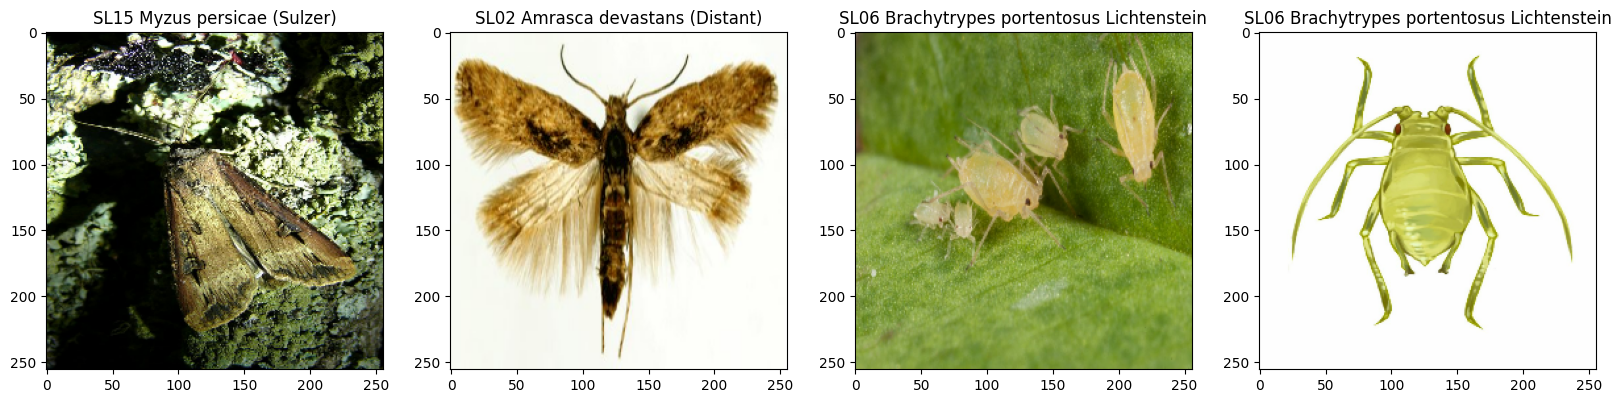

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    class_label = (batch[1][idx])
    ax[idx].title.set_text(class_names[class_label])

## 2. Preprocessing 

2.1 Scale Data

In [40]:
# Normalize the dataset
data = data.map(lambda x, y: (x / 255.0, y))

# Verify scaling
scaled_batch = data.as_numpy_iterator().next()
print("Scaled pixel values:", scaled_batch[0][0, 0, 0])

Scaled pixel values: [0.24784935 0.24793522 0.1378737 ]


2.2 Split Data

In [41]:
# Split the dataset
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

print(f"Train size: {len(train)}, Val size: {len(val)}, Test size: {len(test)}")

Train size: 11, Val size: 3, Test size: 1


## 3. Deep Model

3.1 Build Deep Learning Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [43]:
# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(class_names), activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\Owen Tan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,497,448 (120.15 MB)

 Trainable params: 31,497,448 (120.15 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [44]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
    train,
    epochs=10,
    validation_data=val,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.1878 - loss: 6.5707 - val_accuracy: 0.3542 - val_loss: 1.9966
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.3543 - loss: 1.9796 - val_accuracy: 0.4375 - val_loss: 1.8543
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.5743 - loss: 1.5862 - val_accuracy: 0.6354 - val_loss: 1.1681
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.6554 - loss: 1.0600 - val_accuracy: 0.8542 - val_loss: 0.5980
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.8669 - loss: 0.5954 - val_accuracy: 0.9167 - val_loss: 0.3456
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.9425 - loss: 0.2659 - val_accuracy: 0.8750 - val_loss: 0.3167
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9485 - loss: 0.1475 - val_accuracy: 0.9792 - val_loss: 0.1024
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.9991 - loss: 0.0528 - val_accuracy: 0.

3.3 Plot Performance

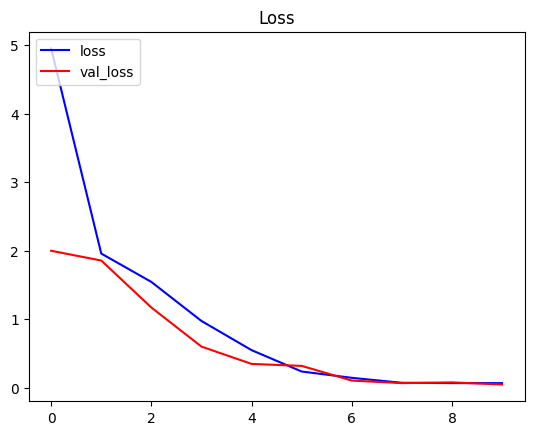

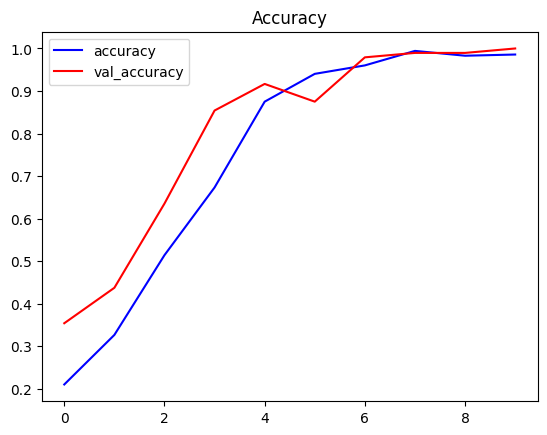

In [58]:
# Plot loss
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

# Plot accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.show()

## 4. Evaluate Performance

4.1 Evaluate

In [54]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [55]:
# Define metrics
precision = Precision()
recall = Recall()
accuracy = SparseCategoricalAccuracy()

# Evaluate model on test data
for X, y in test.as_numpy_iterator():
    y_pred = model.predict(X)

    # Convert predictions to class indices
    y_pred = np.argmax(y_pred, axis=-1)

    # Update metrics
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

# Print results
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())
print("Accuracy:", accuracy.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 0.0


4.2 Test

In [65]:
#belum

## 5. Save the Model

5.1 Save the Model

In [56]:
# Save the model
model.save('/mnt/data/potato_pest_classifier.h5')
print("Model saved successfully!")

Model saved successfully!
